In [1]:
#Import Libraries

import pandas as pd
import numpy as np 
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Data Analysis

In [3]:
train_data.dtypes

id            int64
tid1          int64
tid2          int64
title1_en    object
title2_en    object
label        object
dtype: object

In [4]:
train_data.head()

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated


In [5]:
train_data.tail()

,id,tid1,tid2,title1_en,title2_en,label
256437,113364,167562,48447,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated
256438,49407,167562,49795,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated
256439,130134,167562,114783,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated
256440,101494,167562,137705,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated
256441,89356,167563,66480,Will the United States wage war on Iraq withou...,Saddam's daughter refutes rumors: no. 2 of Sad...,unrelated


In [6]:
train_data.shape

(256442, 6)

In [7]:
train_data.isnull().sum()/len(train_data)*100

id           0.0
tid1         0.0
tid2         0.0
title1_en    0.0
title2_en    0.0
label        0.0
dtype: float64

In [8]:
train_data.describe(include="all")

,id,tid1,tid2,title1_en,title2_en,label
count,256442.000000,256442.000000,256442.000000,256442,256442,256442
unique,NaN,NaN,NaN,62697,122492,3
top,NaN,NaN,NaN,Someone from the People's Hospital of Cengxi C...,The world's first talking dog shocked 6 billio...,unrelated
freq,NaN,NaN,NaN,607,49,175598
mean,128220.500000,85063.728434,69712.542399,NaN,NaN,NaN
std,74028.573203,48402.199542,45481.347050,NaN,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,64110.250000,44052.000000,30619.000000,NaN,NaN,NaN
50%,128220.500000,85487.000000,63750.000000,NaN,NaN,NaN
75%,192330.750000,127504.000000,105255.750000,NaN,NaN,NaN


In [9]:
train_data.drop(['tid1', 'tid2', 'id'], axis=1, inplace=True)
train_data.dropna(inplace = True)

In [10]:
train_data

,title1_en,title2_en,label
0,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated
...,...,...,...
256437,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated
256438,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated
256439,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated
256440,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated


In [11]:
train_data['title1_en'] = train_data['title1_en'].apply(lambda x: x.lower())
train_data['title2_en'] = train_data['title2_en'].apply(lambda x: x.lower())

In [12]:
train_data

,title1_en,title2_en,label
0,there are two new old-age insurance benefits f...,"police disprove ""bird's nest congress each per...",unrelated
1,"""if you do not come to shenzhen, sooner or lat...",shenzhen's gdp outstrips hong kong? shenzhen s...,unrelated
2,"""if you do not come to shenzhen, sooner or lat...",the gdp overtopped hong kong? shenzhen clarifi...,unrelated
3,"""if you do not come to shenzhen, sooner or lat...",shenzhen's gdp overtakes hong kong? bureau of ...,unrelated
4,"""if you do not come to shenzhen, sooner or lat...",shenzhen's gdp outpaces hong kong? defending r...,unrelated
...,...,...,...
256437,egypt 's presidential election failed to win m...,salah is retiring? football association offici...,unrelated
256438,egypt 's presidential election failed to win m...,liverpool's bid for little germany? the echo's...,unrelated
256439,egypt 's presidential election failed to win m...,west media exposing tallahlach has been recomm...,unrelated
256440,egypt 's presidential election failed to win m...,rumor has it that egypt is very united and the...,unrelated


The function called "stemming" that takes a piece of text (the "content" parameter) as input and returns the stemmed version of the text. Stemming is the process of reducing words to their root or base form, which can be useful for tasks such as text classification or information retrieval.

The function first initializes an instance of the PorterStemmer class from the nltk library. This stemmer applies a set of rules to reduce words to their stems.

Next, the function removes all characters that are not letters of the alphabet from the input text using a regular expression. The text is then converted to lowercase and split into a list of individual words.

The function then applies stemming to each word in the list, excluding any words that appear in the stopwords.words('english') list. This list contains common English words (such as "the" and "and") that are often excluded from text analysis tasks.

Finally, the stemmed words are joined back together into a single string and returned as the output of the function.

In [13]:
portstem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [portstem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
train_data['title1_en'] = train_data['title1_en'].apply(stemming)
train_data['title2_en'] = train_data['title2_en'].apply(stemming)

In [16]:
train_data

,title1_en,title2_en,label
0,two new old age insur benefit old peopl rural ...,polic disprov bird nest congress person get yu...,unrelated
1,come shenzhen sooner later son also come less ...,shenzhen gdp outstrip hong kong shenzhen stati...,unrelated
2,come shenzhen sooner later son also come less ...,gdp overtop hong kong shenzhen clarifi littl bit,unrelated
3,come shenzhen sooner later son also come less ...,shenzhen gdp overtak hong kong bureau statist ...,unrelated
4,come shenzhen sooner later son also come less ...,shenzhen gdp outpac hong kong defend rumor gap...,unrelated
...,...,...,...
256437,egypt presidenti elect fail win million vote e...,salah retir footbal associ offici lie,unrelated
256438,egypt presidenti elect fail win million vote e...,liverpool bid littl germani echo disclaim summer,unrelated
256439,egypt presidenti elect fail win million vote e...,west media expos tallahlach recommend barca ag...,unrelated
256440,egypt presidenti elect fail win million vote e...,rumor egypt unit differ us,unrelated


In [18]:
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [19]:
x_train.head()

,title1_en,title2_en
0,two new old age insur benefit old peopl rural ...,polic disprov bird nest congress person get yu...
1,come shenzhen sooner later son also come less ...,shenzhen gdp outstrip hong kong shenzhen stati...
2,come shenzhen sooner later son also come less ...,gdp overtop hong kong shenzhen clarifi littl bit
3,come shenzhen sooner later son also come less ...,shenzhen gdp overtak hong kong bureau statist ...
4,come shenzhen sooner later son also come less ...,shenzhen gdp outpac hong kong defend rumor gap...


In [20]:
y_train.head()

0    unrelated
1    unrelated
2    unrelated
3    unrelated
4    unrelated
Name: label, dtype: object

In [21]:
#converting text data to numerical data
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
vectorizer.fit(pd.concat([x_train['title1_en'], x_train['title2_en']]))

title1 = vectorizer.transform(x_train['title1_en'])
title2 = vectorizer.transform(x_train['title2_en'])

In [22]:
sparse_matrix = hstack([title1, title2])

In [23]:
sparse_matrix

<256442x55276 sparse matrix of type '<class 'numpy.float64'>'
	with 4772961 stored elements in Compressed Sparse Row format>

## Model Selection

### Model 1 - Logistic Regression

In [25]:
# Libraries for the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Test - Train split of train_data
x = sparse_matrix
y = y_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [27]:
Logisticmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=10)


In [28]:
# Fit the model to the training data
Logisticmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=10)

In [29]:
# Make predictions on the test data
y_pred = Logisticmodel.predict(x_test)

In [30]:
# Evaluate the Logistic model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      agreed       0.71      0.62      0.66     14885
   disagreed       0.74      0.26      0.39      1338
   unrelated       0.83      0.89      0.86     35066

    accuracy                           0.80     51289
   macro avg       0.76      0.59      0.63     51289
weighted avg       0.79      0.80      0.79     51289



## Logistic Model on Test.csv

In [31]:
test_data.head()

,id,tid1,tid2,title1_en,title2_en
0,256442,100672,100673,"The great coat brother Zhu Zhu Wen, in the man...","Lin xinsheng after the birth of ""hard milking,..."
1,256443,162269,162270,NASA reveals facts about UFO wreckage found on...,"The UFO found in Yuancun, Jiaocheng County, Sh..."
2,256444,157826,157854,The hollow tomatoes are loaded with hormones.,"Li chenfan bingbing home photos, netizen: this..."
3,256445,109579,74076,Ange Pavilion Geoshui: How accurate is Matrimo...,Master one: the eight-character presumption of...
4,256446,15068,15085,A 50-year-old bus-bus blows up an 8-year-old c...,< i > Joe Johnson's disgruntled timing and ord...


In [32]:
test_data.shape

(64110, 5)

In [33]:
test_data.drop(['tid1', 'tid2', 'id'], axis=1, inplace=True)
test_data.dropna(inplace = True)

In [34]:
test_data['title1_en'] = test_data['title1_en'].apply(lambda x: x.lower())
test_data['title2_en'] = test_data['title2_en'].apply(lambda x: x.lower())

In [35]:
test_data

,title1_en,title2_en
0,"the great coat brother zhu zhu wen, in the man...","lin xinsheng after the birth of ""hard milking,..."
1,nasa reveals facts about ufo wreckage found on...,"the ufo found in yuancun, jiaocheng county, sh..."
2,the hollow tomatoes are loaded with hormones.,"li chenfan bingbing home photos, netizen: this..."
3,ange pavilion geoshui: how accurate is matrimo...,master one: the eight-character presumption of...
4,a 50-year-old bus-bus blows up an 8-year-old c...,< i > joe johnson's disgruntled timing and ord...
...,...,...
64105,the lead content of domestic faucet exceeds th...,"the multi-brand faucet is overtaxed, who is en..."
64106,"in 2018, the household registration system has...","in 2018, the household registration system wil..."
64107,"onion can not be eaten with this, serious also...","onion can not eat with this, serious also can ..."
64108,"grass-root teacher salaries, the last increase...","teachers wage reform, there will be these thre..."


In [36]:
test_data['title1_en'] = test_data['title1_en'].apply(stemming)
test_data['title2_en'] = test_data['title2_en'].apply(stemming)

In [37]:
test_data.head()

,title1_en,title2_en
0,great coat brother zhu zhu wen mandarin love s...,lin xinsheng birth hard milk huo jianhua seen ...
1,nasa reveal fact ufo wreckag found moon,ufo found yuancun jiaocheng counti shanxi shoc...
2,hollow tomato load hormon,li chenfan bingb home photo netizen call luxur...
3,ang pavilion geoshui accur matrimoni match mat...,master one eight charact presumpt marriag soon...
4,year old bu bu blow year old child rumor rumor...,joe johnson disgruntl time order myth


In [38]:
title1 = vectorizer.transform(test_data['title1_en'])
title2 = vectorizer.transform(test_data['title2_en'])

In [39]:
sparse_test_matrix = hstack([title1, title2])

In [40]:
y_test_pred_logisticmodel = Logisticmodel.predict(sparse_test_matrix)

The logistic model appears to have decent performance on the given dataset.

### Model 2 - Random Forest

In [41]:
RandomForest_model = RandomForestClassifier(n_estimators=50, random_state=10)
RandomForest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=10)

In [42]:
y_pred_randfomforest = RandomForest_model.predict(x_test)
print(classification_report(y_test, y_pred_randfomforest))

              precision    recall  f1-score   support

      agreed       0.84      0.71      0.77     14885
   disagreed       0.77      0.33      0.46      1338
   unrelated       0.86      0.94      0.90     35066

    accuracy                           0.86     51289
   macro avg       0.83      0.66      0.71     51289
weighted avg       0.85      0.86      0.85     51289



### Model 3 - Neural Network

In [43]:
import tensorflow as tf

In [44]:
max_len = 30
max_words = 10000

In [45]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token='')

In [46]:
vocab_t1 = train_data['title1_en']
vocab_t2 = train_data['title2_en']
all_words = vocab_t1 + vocab_t2

tokenizer.fit_on_texts(all_words)

In [47]:
t1_df = tokenizer.texts_to_sequences(vocab_t1)
t2_df = tokenizer.texts_to_sequences(vocab_t2)

In [48]:
t1_df = tf.keras.preprocessing.sequence.pad_sequences(t1_df, maxlen=max_len)
t2_df = tf.keras.preprocessing.sequence.pad_sequences(t2_df, maxlen=max_len)

In [49]:
t1_df[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   72,  764, 2486,  786,  131,   39,   72,  341,
          3,  764,  487, 3979, 2301, 2599,  489,  558])

In [50]:
labels = {'agreed': 0, 'disagreed': 1, 'unrelated': 2}

y_train = train_data.label.apply(lambda x: labels[x])
y_train = np.asarray(y_train).astype('float32')

In [51]:
y_train = tf.keras.utils.to_categorical(y_train)
y_train[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [52]:
t1_df, x1_val, t2_df, x2_val, y_train, y_val = train_test_split(t1_df, t2_df, y_train, test_size=0.2)

In [53]:
t1_input = tf.keras.Input(shape=(max_len,))
t2_input = tf.keras.Input(shape=(max_len,))

# siamese model with GRU
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding Turns positive integers into dense vectors of fixed size.
t1_embedding = tf.keras.layers.Embedding(max_words, 128)(t1_input)
t2_embedding = tf.keras.layers.Embedding(max_words, 128)(t2_input)

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU
t1_gru = tf.keras.layers.GRU(64)(t1_embedding)
t2_gru = tf.keras.layers.GRU(64)(t2_embedding)

# t1_dense = tf.keras.layers.Dense(32, activation='relu')(t1_gru)
# t2_dense = tf.keras.layers.Dense(32, activation='relu')(t2_gru)

concat = tf.keras.layers.concatenate([t1_gru, t2_gru])

output = tf.keras.layers.Dense(3, activation='softmax')(concat)

model = tf.keras.Model(inputs=[t1_input, t2_input], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 128)      1280000     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 30, 128)      1280000     ['input_2[0][0]']                
                                                                                              

In [54]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss=tf.keras.metrics.categorical_crossentropy, metrics=['accuracy'])

In [55]:
history = model.fit(x=[t1_df, t2_df], y=y_train, batch_size=64, epochs=5, validation_data=([x1_val, x2_val], y_val))

Epoch 1/5
3206/3206 [==============================] - 198s 60ms/step - loss: 0.4936 - accuracy: 0.7693 - val_loss: 0.4385 - val_accuracy: 0.7996
Epoch 2/5
3206/3206 [==============================] - 193s 60ms/step - loss: 0.3892 - accuracy: 0.8254 - val_loss: 0.4273 - val_accuracy: 0.8109
Epoch 3/5
3206/3206 [==============================] - 191s 59ms/step - loss: 0.3309 - accuracy: 0.8548 - val_loss: 0.4225 - val_accuracy: 0.8193
Epoch 4/5
3206/3206 [==============================] - 197s 61ms/step - loss: 0.2843 - accuracy: 0.8775 - val_loss: 0.4316 - val_accuracy: 0.8210
Epoch 5/5
3206/3206 [==============================] - 192s 60ms/step - loss: 0.2465 - accuracy: 0.8949 - val_loss: 0.4501 - val_accuracy: 0.8244


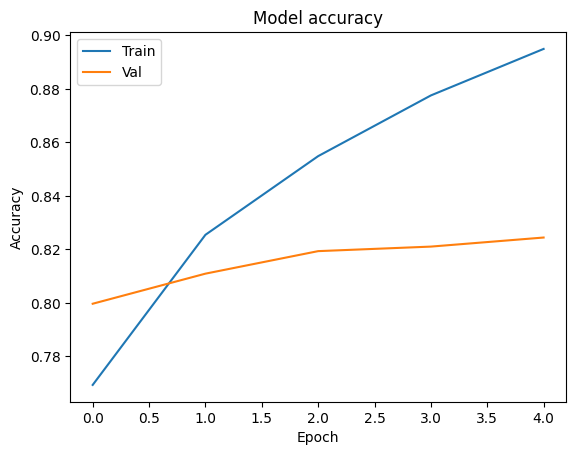

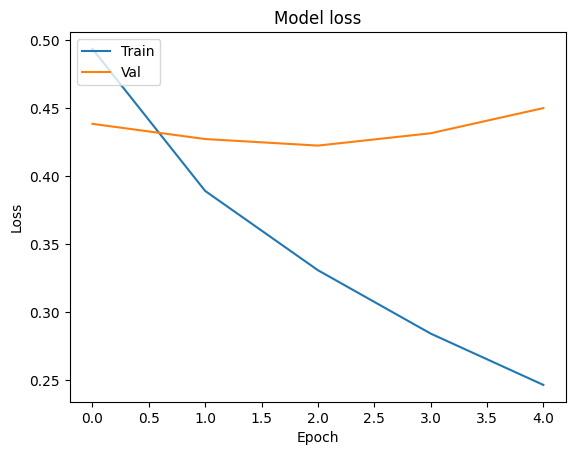

In [56]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [57]:
test = pd.read_csv('test.csv')

In [58]:
x1_test = tokenizer.texts_to_sequences(test['title1_en'])
x2_test = tokenizer.texts_to_sequences(test['title2_en'])

x1_test = tf.keras.preprocessing.sequence.pad_sequences(x1_test, maxlen=max_len)
x2_test = tf.keras.preprocessing.sequence.pad_sequences(x2_test, maxlen=max_len)    

pred = model.predict([x1_test, x2_test])

2004/2004 [==============================] - 11s 5ms/step


In [59]:
test.drop(['tid1', 'tid2'], axis=1, inplace=True)

ilabels = {0: 'agreed', 1: 'disagreed', 2: 'unrelated'}

for i in range(len(pred)):
    test.loc[i, 'label'] = ilabels[np.argmax(pred[i])]

test.to_csv('results.csv', index=False)
test.head()

,id,title1_en,title2_en,label
0,256442,"The great coat brother Zhu Zhu Wen, in the man...","Lin xinsheng after the birth of ""hard milking,...",unrelated
1,256443,NASA reveals facts about UFO wreckage found on...,"The UFO found in Yuancun, Jiaocheng County, Sh...",unrelated
2,256444,The hollow tomatoes are loaded with hormones.,"Li chenfan bingbing home photos, netizen: this...",unrelated
3,256445,Ange Pavilion Geoshui: How accurate is Matrimo...,Master one: the eight-character presumption of...,unrelated
4,256446,A 50-year-old bus-bus blows up an 8-year-old c...,< i > Joe Johnson's disgruntled timing and ord...,unrelated
